##  Lab 2

Assignment 1 to 7


In [5]:
import pandas as pd
import numpy as np




def a1_purchase_matrix_and_rank(file_path):
    print("\n--- A1: Purchase Data Analysis ---")

    df = pd.read_excel(file_path, sheet_name="Purchase data")

    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Payment (Rs)'].values

    print("Feature Matrix X:\n", X)
    print("Output Vector y:\n", y)

    print("Dimensionality of vector space:", X.shape[1])
    print("Number of vectors:", X.shape[0])

    rank = np.linalg.matrix_rank(X)
    print("Rank of feature matrix:", rank)

    X_pinv = np.linalg.pinv(X)
    cost = X_pinv.dot(y)

    print("Cost of items [Candies, Mangoes, Milk]:")
    print(cost)

a1_purchase_matrix_and_rank("/content/Lab Session Data.xlsx")





--- A1: Purchase Data Analysis ---
Feature Matrix X:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Output Vector y:
 [386 289 393 110 280 167 271 274 148 198]
Dimensionality of vector space: 3
Number of vectors: 10
Rank of feature matrix: 3
Cost of items [Candies, Mangoes, Milk]:
[ 1. 55. 18.]


In [7]:
def a2_rich_poor_classifier(file_path):
    print("\n--- A2: Rich / Poor Classification ---")

    df = pd.read_excel(file_path, sheet_name="Purchase data")

    df['Class'] = df['Payment (Rs)'].apply(
        lambda x: "RICH" if x > 200 else "POOR"
    )

    print(df[['Payment (Rs)', 'Class']])
    print("Rule: Payment > 200 → RICH else POOR")

a2_rich_poor_classifier("/content/Lab Session Data.xlsx")



--- A2: Rich / Poor Classification ---
   Payment (Rs) Class
0           386  RICH
1           289  RICH
2           393  RICH
3           110  POOR
4           280  RICH
5           167  POOR
6           271  RICH
7           274  RICH
8           148  POOR
9           198  POOR
Rule: Payment > 200 → RICH else POOR



--- A3: IRCTC Stock Analysis ---
Mean Price: 1560.6634538152612
Variance: 58496.49239931613
Custom Mean: 1560.6634538152598
Custom Variance: 58496.49239931618
Wednesday Mean: 1550.7060000000001
April Mean: 1698.9526315789474
Probability of Loss: 0.4979919678714859
Profit on Wednesday Probability: 0.08433734939759036
Conditional P(Profit | Wednesday): 0.42


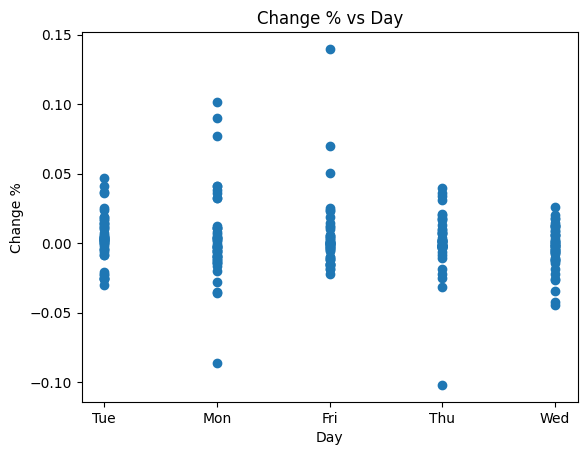

In [8]:
def a3_irctc_analysis(file_path):
    print("\n--- A3: IRCTC Stock Analysis ---")

    df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

    price = df['Price'].values

    print("Mean Price:", np.mean(price))
    print("Variance:", np.var(price))

    def custom_mean(arr):
        total = 0
        for x in arr:
            total += x
        return total / len(arr)

    def custom_variance(arr):
        m = custom_mean(arr)
        total = 0
        for x in arr:
            total += (x - m) ** 2
        return total / len(arr)

    print("Custom Mean:", custom_mean(price))
    print("Custom Variance:", custom_variance(price))

    wed_data = df[df['Day'] == 'Wed']
    print("Wednesday Mean:", wed_data['Price'].mean())

    april_data = df[df['Month'] == 'Apr']
    print("April Mean:", april_data['Price'].mean())

    loss_prob = len(df[df['Chg%'] < 0]) / len(df)
    print("Probability of Loss:", loss_prob)

    wed_profit = wed_data[wed_data['Chg%'] > 0]
    print("Profit on Wednesday Probability:",
          len(wed_profit) / len(df))

    print("Conditional P(Profit | Wednesday):",
          len(wed_profit) / len(wed_data))

    plt.scatter(df['Day'], df['Chg%'])
    plt.title("Change % vs Day")
    plt.xlabel("Day")
    plt.ylabel("Change %")
    plt.show()


a3_irctc_analysis("/content/Lab Session Data.xlsx")

In [9]:
def a4_thyroid_exploration(file_path):
    print("\n--- A4: Thyroid Data Exploration ---")

    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    print("Data Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nSummary Statistics:\n", df.describe())

a4_thyroid_exploration("/content/Lab Session Data.xlsx")


--- A4: Thyroid Data Exploration ---
Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI          

In [10]:
def a5_jaccard_smc(file_path):
    print("\n--- A5: Jaccard and SMC ---")

    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    binary_df = df.select_dtypes(include=[np.number]).fillna(0)

    v1 = binary_df.iloc[0].values
    v2 = binary_df.iloc[1].values

    f11 = np.sum((v1 == 1) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))

    jc = f11 / (f01 + f10 + f11)
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)

    print("Jaccard Coefficient:", jc)
    print("Simple Matching Coefficient:", smc)

a5_jaccard_smc("/content/Lab Session Data.xlsx")


--- A5: Jaccard and SMC ---
Jaccard Coefficient: nan
Simple Matching Coefficient: nan


/tmp/ipython-input-2167492031.py:16: RuntimeWarning: invalid value encountered in scalar divide
  jc = f11 / (f01 + f10 + f11)
/tmp/ipython-input-2167492031.py:17: RuntimeWarning: invalid value encountered in scalar divide
  smc = (f11 + f00) / (f00 + f01 + f10 + f11)


In [11]:
def a6_cosine_similarity(file_path):
    print("\n--- A6: Cosine Similarity ---")

    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    data = df.select_dtypes(include=[np.number]).fillna(0)

    v1 = data.iloc[0].values
    v2 = data.iloc[1].values

    cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    print("Cosine Similarity:", cos_sim)

a6_cosine_similarity("/content/Lab Session Data.xlsx")


--- A6: Cosine Similarity ---
Cosine Similarity: 0.9999999999999997



--- A7: Similarity Heatmap ---


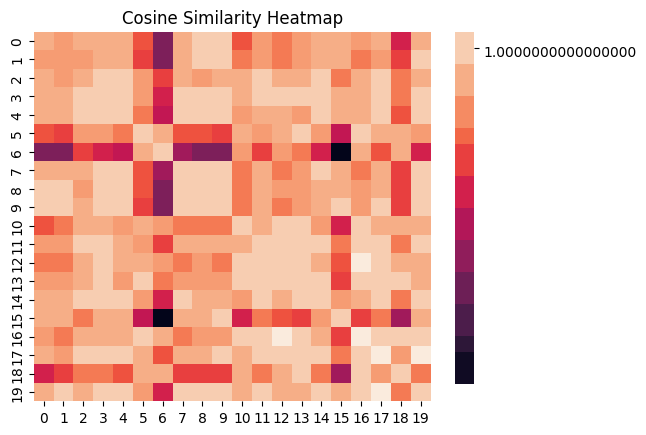

In [12]:

def a7_heatmap(file_path):
    print("\n--- A7: Similarity Heatmap ---")

    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")
    data = df.select_dtypes(include=[np.number]).fillna(0).iloc[:20]

    cosine_matrix = np.zeros((20, 20))

    for i in range(20):
        for j in range(20):
            cosine_matrix[i][j] = np.dot(data.iloc[i], data.iloc[j]) / (
                np.linalg.norm(data.iloc[i]) * np.linalg.norm(data.iloc[j])
            )

    sns.heatmap(cosine_matrix, annot=False)
    plt.title("Cosine Similarity Heatmap")
    plt.show()


a7_heatmap("/content/Lab Session Data.xlsx")
